The Goal here is to make distributions and add features based on distributions and categories.
we removed the outliers and made new features.  
 The result of this process in some steps that at the end stored in dataframes and CSVs: 
 1- final_episodes (All - diag/med related features) 
 2- final_episodes4 (All + diag/med related features)

In [555]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from kneed import DataGenerator, KneeLocator 
from sklearn import metrics
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import warnings
# pd.set_option('display.max_columns', None)


In [556]:
#load the data
episodes = pd.read_csv('/home/kabank/workbench/.conda/analysis/Resources/epiosdes2.csv') # before merge
full_episodes = pd.read_csv('/home/kabank/workbench/.conda/analysis/Resources/full_episodes.csv') # after merge

In [557]:
episodes[episodes['pasient']==19805]

,pasient,episode_id,patient_age,remaining_time_countdown,var_no_dates_permonth,gender,episode_order,islast,closingcode,aftercode,...,count_inpatient,count_lmssciadm,count_inpatient_day,count_inpatient_daynight,count_terapi,count_undersokelse,count_radge,count_behplanlegging,count_ikkemott,count_others
1793,19805,2894,13,275,0.829156,M,1,0,9,5,...,1,0,0,1,1,5,0,0,0,0
9264,19805,15284,13,272,0.471405,M,2,0,9,5,...,1,0,0,1,0,2,0,0,0,0
15321,19805,25296,24,146,0.000000,M,3,1,2,1,...,2,0,0,2,1,1,0,0,0,0


In [558]:
full_episodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17433 entries, 0 to 17432
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                17433 non-null  int64  
 1   pasient                   17433 non-null  int64  
 2   episode_id                17433 non-null  int64  
 3   age                       17433 non-null  int64  
 4   remaining_time_countdown  17433 non-null  int64  
 5   var_no_dates_permonth     17433 non-null  float64
 6   gender                    17433 non-null  object 
 7   episode_order             17433 non-null  int64  
 8   islast                    17433 non-null  int64  
 9   closingcode               17433 non-null  int64  
 10  aftercode                 17433 non-null  int64  
 11  instanskode               17433 non-null  int64  
 12  episode_start_date        17433 non-null  object 
 13  episode_end_date          17433 non-null  object 
 14  count_

In [559]:
full_episodes.columns

Index(['Unnamed: 0', 'pasient', 'episode_id', 'age',
       'remaining_time_countdown', 'var_no_dates_permonth', 'gender',
       'episode_order', 'islast', 'closingcode', 'aftercode', 'instanskode',
       'episode_start_date', 'episode_end_date', 'count_poliklinikk',
       'count_familieavdeling', 'count_dagavdeling', 'count_dognavdeling',
       'count_osv', 'count_outpatient', 'count_inpatient', 'count_lmssciadm',
       'count_inpatient_day', 'count_inpatient_daynight', 'count_terapi',
       'count_undersokelse', 'count_radge', 'count_behplanlegging',
       'count_ikkemott', 'count_others', 'tillnextepisode',
       'starttillnextstart', 'Length_of_Episode'],
      dtype='object')

In [560]:
full_episodes. drop(columns=['Unnamed: 0'], inplace=True)
full_episodes[full_episodes["age"].isna() | (full_episodes["age"]<0)] 

,pasient,episode_id,age,remaining_time_countdown,var_no_dates_permonth,gender,episode_order,islast,closingcode,aftercode,...,count_inpatient_daynight,count_terapi,count_undersokelse,count_radge,count_behplanlegging,count_ikkemott,count_others,tillnextepisode,starttillnextstart,Length_of_Episode


In [561]:
full_episodes[(full_episodes["age"] > 18)] #154 rows that should be removed

,pasient,episode_id,age,remaining_time_countdown,var_no_dates_permonth,gender,episode_order,islast,closingcode,aftercode,...,count_inpatient_daynight,count_terapi,count_undersokelse,count_radge,count_behplanlegging,count_ikkemott,count_others,tillnextepisode,starttillnextstart,Length_of_Episode
16,22,4518,19,209,1.462494,F,1,1,2,2,...,0,8,0,0,0,0,0,NaN,NaN,182
265,370,3966,31,65,0.000000,F,1,1,1,5,...,0,3,1,0,1,0,1,NaN,NaN,2
342,481,568,20,110,0.666667,F,1,1,4,2,...,0,7,0,0,1,0,0,NaN,NaN,548
396,561,18494,50,59,1.577909,F,1,1,1,4,...,0,10,3,0,1,1,1,NaN,NaN,186
465,661,14138,26,101,0.000000,F,1,1,0,5,...,0,2,0,1,0,0,0,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16046,22525,17331,34,65,0.835598,F,1,1,1,2,...,0,5,1,0,2,0,2,NaN,NaN,366
16116,22619,16905,19,32,0.745356,F,2,1,1,5,...,0,5,2,2,1,3,1,NaN,NaN,181
16626,7802,19806,44,2,1.006410,F,2,1,0,5,...,0,152,94,7,15,10,136,NaN,NaN,3382
16739,9807,11202,39,2,0.758500,F,2,1,1,4,...,0,18,2,1,1,2,1,NaN,NaN,922


In [562]:
paseint_list = full_episodes[(full_episodes["age"] > 18)& (full_episodes["episode_order"] > 1) ]['pasient']
full_episodes[full_episodes['pasient'].isin(paseint_list)]

,pasient,episode_id,age,remaining_time_countdown,var_no_dates_permonth,gender,episode_order,islast,closingcode,aftercode,...,count_inpatient_daynight,count_terapi,count_undersokelse,count_radge,count_behplanlegging,count_ikkemott,count_others,tillnextepisode,starttillnextstart,Length_of_Episode
739,1050,28531,17,197,0.276385,F,1,0,5,1,...,0,1,1,0,0,0,0,2377.0,2739.0,363
740,1050,16531,25,113,0.471405,F,2,1,1,4,...,0,2,0,0,1,0,1,NaN,NaN,179
781,1111,1618,8,104,0.697078,F,1,0,1,4,...,0,16,7,10,0,1,0,2011.0,4200.0,2190
782,1111,25595,20,32,0.500000,F,2,1,1,5,...,0,7,1,1,1,1,1,NaN,NaN,181
1202,1707,1906,6,110,0.672051,M,1,0,1,1,...,0,26,11,0,7,1,1,1644.0,6028.0,4385
1203,1707,9092,23,32,0.575845,M,2,0,4,5,...,0,2,1,2,1,0,0,183.0,909.0,727
1204,1707,30780,25,8,0.877544,M,3,1,1,1,...,0,12,4,1,3,0,0,NaN,NaN,554
2272,3233,7940,35,35,1.322876,F,1,0,1,2,...,0,20,8,0,1,2,0,179.0,637.0,459
2273,3233,26750,36,26,1.089725,F,2,1,1,5,...,0,9,5,0,0,3,0,NaN,NaN,93
2542,3616,10324,14,137,0.618110,M,1,0,1,5,...,6,1,1,1,6,0,1,88.0,2282.0,2195


In [563]:
full_episodes.loc[(full_episodes['pasient'].isin(paseint_list)) & (full_episodes['age'] < 19), 'islast'] = 1
full_episodes.loc[(full_episodes['pasient'].isin(paseint_list)) & (full_episodes['age'] < 19), 'tillnextepisode'] = np.nan

In [564]:
full_episodes[(full_episodes['pasient'].isin(paseint_list)) & (full_episodes['age']<19)]

,pasient,episode_id,age,remaining_time_countdown,var_no_dates_permonth,gender,episode_order,islast,closingcode,aftercode,...,count_inpatient_daynight,count_terapi,count_undersokelse,count_radge,count_behplanlegging,count_ikkemott,count_others,tillnextepisode,starttillnextstart,Length_of_Episode
739,1050,28531,17,197,0.276385,F,1,1,5,1,...,0,1,1,0,0,0,0,NaN,2739.0,363
781,1111,1618,8,104,0.697078,F,1,1,1,4,...,0,16,7,10,0,1,0,NaN,4200.0,2190
1202,1707,1906,6,110,0.672051,M,1,1,1,1,...,0,26,11,0,7,1,1,NaN,6028.0,4385
2542,3616,10324,14,137,0.618110,M,1,1,1,5,...,6,1,1,1,6,0,1,NaN,2282.0,2195
2628,3728,16030,17,32,1.589353,M,1,1,1,1,...,0,42,13,3,3,2,2,NaN,823.0,729
5232,7403,21322,14,98,1.419726,M,1,1,1,5,...,0,99,38,28,8,4,1,NaN,2288.0,1918
5883,8330,28801,12,59,1.499953,F,1,1,1,1,...,116,167,59,74,31,29,42,NaN,2645.0,2555
6272,8871,24905,11,170,1.512725,M,1,1,1,4,...,0,42,12,0,5,1,0,NaN,4295.0,1005
6359,9008,23069,16,134,2.702180,F,1,1,2,1,...,219,131,44,47,25,0,6,NaN,3920.0,369
8151,11512,350,8,35,1.530525,M,1,1,1,4,...,0,150,71,61,27,7,13,NaN,4016.0,3285


In [565]:
# Removing the episodes with age null and negative
full_episodes = full_episodes[~(full_episodes["age"].isna() | (full_episodes["age"]<0))]

In [566]:
# Removing the episodes with age older than 18
full_episodes = full_episodes[~(full_episodes["age"] > 18)]

In [567]:
# check updating islast
full_episodes[full_episodes['pasient']==2390]

,pasient,episode_id,age,remaining_time_countdown,var_no_dates_permonth,gender,episode_order,islast,closingcode,aftercode,...,count_inpatient_daynight,count_terapi,count_undersokelse,count_radge,count_behplanlegging,count_ikkemott,count_others,tillnextepisode,starttillnextstart,Length_of_Episode
1671,2390,3919,6,92,0.243885,F,1,0,1,4,...,0,1,3,2,3,0,2,1826.0,2282.0,457
1672,2390,4360,12,8,0.400000,F,2,1,1,4,...,0,6,1,0,1,1,0,NaN,NaN,738


In [568]:
outliers1 = full_episodes[full_episodes["Length_of_Episode"]>6570] 
outliers1["Length_of_Episode"].describe()

count       4.000000
mean     6734.500000
std       152.736156
min      6578.000000
25%      6644.000000
50%      6712.500000
75%      6803.000000
max      6935.000000
Name: Length_of_Episode, dtype: float64

In [569]:
ll =[]
ll = outliers1['episode_id'].unique()
print(*ll)
#1525 16916 1932 : >6570 (18*365)
# 25279 : >6934 (19*365 - 1)
# I do not want to remove any of them, they seem fine

1525 16916 1932 25279


In [570]:
outliers1['episode_id'].unique()

array([ 1525, 16916,  1932, 25279])

In [571]:
l = outliers1['pasient'].unique()
c = full_episodes[full_episodes['pasient'].isin(l)]
len(c)
c[['pasient', 'episode_id', 'age',
       'remaining_time_countdown', 'gender', 'episode_order', 'islast',
       'closingcode', 'aftercode', 'episode_start_date',
       'episode_end_date', 'count_poliklinikk', 'count_familieavdeling',
       'count_dagavdeling', 'count_dognavdeling', 'count_osv',
       'count_outpatient', 'count_inpatient', 'count_lmssciadm',
       'count_inpatient_day', 'count_inpatient_daynight', 'count_terapi',
       'count_undersokelse', 'count_radge', 'count_behplanlegging', 'tillnextepisode', 'Length_of_Episode']]

,pasient,episode_id,age,remaining_time_countdown,gender,episode_order,islast,closingcode,aftercode,episode_start_date,...,count_inpatient,count_lmssciadm,count_inpatient_day,count_inpatient_daynight,count_terapi,count_undersokelse,count_radge,count_behplanlegging,tillnextepisode,Length_of_Episode
5285,7492,1525,17,59,M,1,1,2,2,1994-01-06,...,3,0,0,3,12,2,0,1,NaN,6666
8032,11336,16916,17,62,F,1,1,4,2,1994-01-03,...,11,0,0,11,12,2,0,10,NaN,6578
15608,21915,1932,15,32,M,1,1,1,4,1996-01-02,...,0,0,0,0,5,10,9,7,NaN,6759
16689,8875,25279,15,29,F,2,1,1,4,1995-10-05,...,8,0,3,5,29,12,3,1,NaN,6935


In [572]:
full_episodes.dropna(subset=['Length_of_Episode'], inplace=True)

In [573]:
len(full_episodes) 

17279

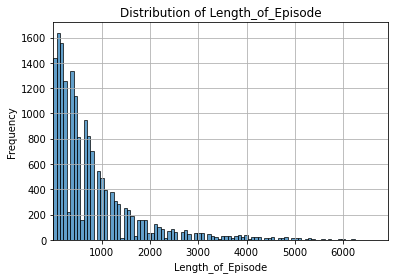

In [574]:
num_bins = 100
# Calculate the range of data on the x-axis
min_length = full_episodes['Length_of_Episode'].min()
max_length = full_episodes['Length_of_Episode'].max()


# Create the histogram
plt.hist(full_episodes['Length_of_Episode'], bins=num_bins, edgecolor="k", alpha=0.7)

# Set labels and title
plt.xlabel("Length_of_Episode")
plt.ylabel("Frequency")
plt.title("Distribution of Length_of_Episode")

# Set the x-axis limits based on the data range
plt.xlim(min_length, max_length)

# Display the grid and show the plot
plt.grid(True)
plt.show()

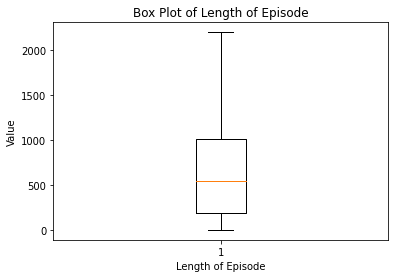

In [575]:
plt.boxplot(full_episodes['Length_of_Episode'], showfliers=False)
plt.xlabel('Length of Episode')
plt.ylabel('Value')
plt.title('Box Plot of Length of Episode')
plt.show()

In [576]:
#check
#full_episodes[(full_episodes['tillnextepisode'].isnull()) & (full_episodes['islast'] == 0)] # NULL
####################
#1- continuity (the case of overlap with tangent type)
#full_episodes[(full_episodes['tillnextepisode'] == 0) & (full_episodes['islast'] == 0)] # NULL
#2- synchronicity & interference
#len(full_episodes[(full_episodes['tillnextepisode']<0) & (full_episodes['islast'] == 0)]) # 0 episodes
#3- dispersion
len(full_episodes[(full_episodes['tillnextepisode']>0)]) #& (full_episodes['islast'] == 0)]) # 4523 episodes

2367

In [577]:
full_episodes['tillnextepisode'].describe()

count    2367.000000
mean      662.351077
std       677.049895
min         1.000000
25%       180.000000
50%       452.000000
75%       914.000000
max      5109.000000
Name: tillnextepisode, dtype: float64

In [578]:
full_episodes[full_episodes["tillnextepisode"].isna()]

,pasient,episode_id,age,remaining_time_countdown,var_no_dates_permonth,gender,episode_order,islast,closingcode,aftercode,...,count_inpatient_daynight,count_terapi,count_undersokelse,count_radge,count_behplanlegging,count_ikkemott,count_others,tillnextepisode,starttillnextstart,Length_of_Episode
0,2,3836,12,20,1.040000,F,1,1,1,1,...,0,26,13,5,8,0,2,NaN,NaN,732
1,6,24660,6,116,1.233893,M,1,1,3,5,...,0,22,16,3,3,5,1,NaN,NaN,1009
2,7,22380,8,5,1.459513,M,1,1,1,1,...,0,12,17,6,6,2,1,NaN,NaN,375
3,8,28188,16,146,1.131371,F,1,1,1,4,...,0,26,11,7,3,3,2,NaN,NaN,742
4,10,7441,17,95,1.581139,F,1,1,1,5,...,41,10,7,11,0,0,13,NaN,NaN,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17428,22553,7950,15,80,0.602646,F,3,1,1,5,...,230,181,61,79,25,8,55,NaN,NaN,1283
17429,22595,16793,15,65,0.297560,F,2,1,9,1,...,0,5,2,0,2,0,1,NaN,NaN,366
17430,22603,18636,15,101,1.907357,F,2,1,3,5,...,442,212,98,160,25,4,35,NaN,NaN,1094
17431,22604,7521,12,167,0.790569,M,2,1,1,2,...,31,12,5,11,1,0,2,NaN,NaN,98


In [579]:
full_episodes[full_episodes["tillnextepisode"]>6570] #>6570:0, >6934:0

,pasient,episode_id,age,remaining_time_countdown,var_no_dates_permonth,gender,episode_order,islast,closingcode,aftercode,...,count_inpatient_daynight,count_terapi,count_undersokelse,count_radge,count_behplanlegging,count_ikkemott,count_others,tillnextepisode,starttillnextstart,Length_of_Episode


In [580]:
full_episodes['check_TNE'] = (((19* 365 - 1)) - ((full_episodes["age"])* 365 + full_episodes['Length_of_Episode']))
full_episodes['check_TNE']

0        1822
1        3735
2        3639
3         352
4         637
         ... 
17428     176
17429    1093
17430     365
17431    2456
17432     902
Name: check_TNE, Length: 17279, dtype: int64

In [581]:
outliers2 = full_episodes[(full_episodes['check_TNE']<full_episodes['tillnextepisode']) & (full_episodes['tillnextepisode']>0)][['pasient','episode_id','age', 'check_TNE','tillnextepisode']]
print(outliers2)
outliers2["tillnextepisode"].describe()

Empty DataFrame
Columns: [pasient, episode_id, age, check_TNE, tillnextepisode]
Index: []


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: tillnextepisode, dtype: float64

In [582]:
l2 = outliers2['pasient'].unique()
c2 = full_episodes[full_episodes['pasient'].isin(l2)]
len(c2)
c2[['pasient', 'episode_id', 'age',
       'remaining_time_countdown', 'gender', 'episode_order', 'islast',
       'closingcode', 'aftercode', 'episode_start_date',
       'episode_end_date', 'count_poliklinikk', 'count_familieavdeling',
       'count_dagavdeling', 'count_dognavdeling', 'count_osv',
       'count_outpatient', 'count_inpatient', 'count_lmssciadm',
       'count_inpatient_day', 'count_inpatient_daynight', 'count_terapi',
       'count_undersokelse', 'count_radge', 'count_behplanlegging', 'tillnextepisode', 'Length_of_Episode', 'check_TNE']]
# I think there is no problem with theses episodes, they are not really outliers

,pasient,episode_id,age,remaining_time_countdown,gender,episode_order,islast,closingcode,aftercode,episode_start_date,...,count_lmssciadm,count_inpatient_day,count_inpatient_daynight,count_terapi,count_undersokelse,count_radge,count_behplanlegging,tillnextepisode,Length_of_Episode,check_TNE


In [583]:
full_episodes[full_episodes['pasient']==2390][['episode_id', 'age', 'episode_start_date', 'episode_end_date','check_TNE', 'tillnextepisode', 'remaining_time_countdown', 'Length_of_Episode']]

,episode_id,age,episode_start_date,episode_end_date,check_TNE,tillnextepisode,remaining_time_countdown,Length_of_Episode
1671,3919,6,2008-03-31,2009-06-30,4287,1826.0,92,457
1672,4360,12,2014-06-30,2016-07-06,1816,NaN,8,738


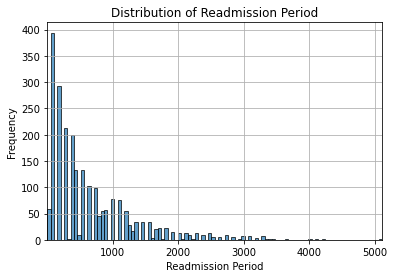

In [584]:
num_bins = 100
# Calculate the range of data on the x-axis
min_length = full_episodes['tillnextepisode'].min()
max_length = full_episodes['tillnextepisode'].max()

# Create the histogram
plt.hist(full_episodes['tillnextepisode'], bins=num_bins, edgecolor="k", alpha=0.7)

# Set labels and title
plt.xlabel("Readmission Period")
plt.ylabel("Frequency")
plt.title("Distribution of Readmission Period")

# Set the x-axis limits based on the data range
plt.xlim(min_length, max_length)

# Display the grid and show the plot
plt.grid(True)
plt.show()

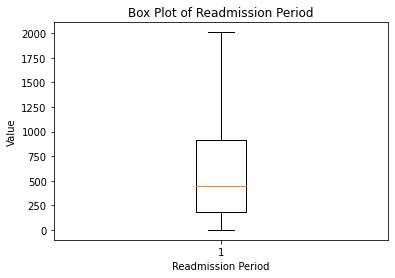

In [585]:
import matplotlib.pyplot as plt

# Filter rows where 'tillnextepisode' is not null
tillnextepisode_series = full_episodes['tillnextepisode'].dropna()

# Creating the boxplot
plt.boxplot(tillnextepisode_series, showfliers=False)
plt.xlabel('Readmission Period')
plt.ylabel('Value')
plt.title('Box Plot of Readmission Period')
plt.show()

In [586]:
len(full_episodes) 

17279

In [587]:
full_episodes["tillnextepisode"].describe()

count    2367.000000
mean      662.351077
std       677.049895
min         1.000000
25%       180.000000
50%       452.000000
75%       914.000000
max      5109.000000
Name: tillnextepisode, dtype: float64

In [588]:
full_episodes["Length_of_Episode"].describe()

count    17279.000000
mean       812.723537
std        936.189288
min          1.000000
25%        187.000000
50%        546.000000
75%       1011.000000
max       6935.000000
Name: Length_of_Episode, dtype: float64

In [589]:
full_episodes.dropna(subset=['Length_of_Episode'], inplace=True)

In [590]:
full_episodes["Length_of_Episode"].describe()

count    17279.000000
mean       812.723537
std        936.189288
min          1.000000
25%        187.000000
50%        546.000000
75%       1011.000000
max       6935.000000
Name: Length_of_Episode, dtype: float64

In [591]:
full_episodes[(full_episodes["age"] > 18) & (full_episodes["islast"] ==1)]

,pasient,episode_id,age,remaining_time_countdown,var_no_dates_permonth,gender,episode_order,islast,closingcode,aftercode,...,count_terapi,count_undersokelse,count_radge,count_behplanlegging,count_ikkemott,count_others,tillnextepisode,starttillnextstart,Length_of_Episode,check_TNE


In [592]:
len(full_episodes)

17279

In [593]:
if 'IsLast' in full_episodes.columns:
    full_episodes = full_episodes.drop(columns=['IsLast'])


In [594]:
full_episodes["Length_of_Episode"] = full_episodes["Length_of_Episode"].astype(int)
full_episodes["age"] = full_episodes["age"].astype(int)

In [595]:
full_episodes[full_episodes["Length_of_Episode"].isna()] # null
full_episodes[full_episodes["Length_of_Episode"]>6934] # >4000:341, >5000:106, >6000:21, >6570:4, >6934:1
full_episodes[full_episodes["tillnextepisode"]>6570] # >5000:1, >6570:0
full_episodes[(full_episodes["age"]>18) | (full_episodes["age"]<0)] # null
full_episodes[full_episodes["gender"].isna()] # null
full_episodes[full_episodes["gender"]==0] # null
full_episodes.head(3)

,pasient,episode_id,age,remaining_time_countdown,var_no_dates_permonth,gender,episode_order,islast,closingcode,aftercode,...,count_terapi,count_undersokelse,count_radge,count_behplanlegging,count_ikkemott,count_others,tillnextepisode,starttillnextstart,Length_of_Episode,check_TNE
0,2,3836,12,20,1.040000,F,1,1,1,1,...,26,13,5,8,0,2,NaN,NaN,732,1822
1,6,24660,6,116,1.233893,M,1,1,3,5,...,22,16,3,3,5,1,NaN,NaN,1009,3735
2,7,22380,8,5,1.459513,M,1,1,1,1,...,12,17,6,6,2,1,NaN,NaN,375,3639


In [596]:
len(full_episodes)

17279

In [597]:
#Copy full_episode to final_episode
if 'final_episodes' in locals():
    del final_episodes

final_episodes = full_episodes

In [598]:
final_episodes.drop(columns=['check_TNE'], inplace=True)

In [599]:
full_episodes.columns

Index(['pasient', 'episode_id', 'age', 'remaining_time_countdown',
       'var_no_dates_permonth', 'gender', 'episode_order', 'islast',
       'closingcode', 'aftercode', 'instanskode', 'episode_start_date',
       'episode_end_date', 'count_poliklinikk', 'count_familieavdeling',
       'count_dagavdeling', 'count_dognavdeling', 'count_osv',
       'count_outpatient', 'count_inpatient', 'count_lmssciadm',
       'count_inpatient_day', 'count_inpatient_daynight', 'count_terapi',
       'count_undersokelse', 'count_radge', 'count_behplanlegging',
       'count_ikkemott', 'count_others', 'tillnextepisode',
       'starttillnextstart', 'Length_of_Episode'],
      dtype='object')

In [600]:
final_episodes.to_csv("/home/kabank/workbench/.conda/analysis/Resources/final_episodes.csv")

In [601]:
len(full_episodes) 
len(final_episodes) 

17279

# Binning

In [602]:
data2 = final_episodes["Length_of_Episode"]
#print(data2)
len(data2)

17279

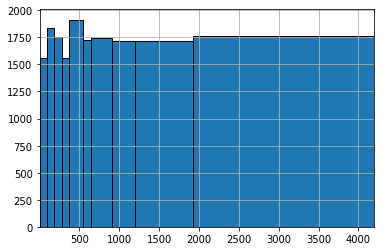

In [603]:
# look at Length_of_Episode
data2 = final_episodes["Length_of_Episode"]
min_length = final_episodes['Length_of_Episode'].min()
max_length = 4200
#define function to calculate equal-frequency bins 
def equalObs(x, nbin):
    nlen = len(x)
    return np.interp(np.linspace(0, nlen, nbin + 1),
                     np.arange(nlen),
                     np.sort(x))

#create histogram with equal-frequency bins 
n, bins, patches = plt.hist(data2, equalObs(data2, 10), edgecolor='black')
plt.xlim(min_length, max_length)
plt.grid(True)
plt.show()

In [604]:
bins, n

(array([1.000e+00, 9.200e+01, 1.840e+02, 2.760e+02, 3.680e+02, 5.460e+02,
        6.470e+02, 9.110e+02, 1.195e+03, 1.920e+03, 6.935e+03]),
 array([1556., 1838., 1752., 1555., 1913., 1729., 1742., 1717., 1714.,
        1763.]))

In [605]:
#range category for length of episode: 
'''
[1.0 - 92.0)
[92.0 - 184.0)
[184.0 - 276.0)
[276.0 - 368.0)
[368.0 - 546.0)
[546.0 - 647.0)
[647.0 - 911.0)
[911.0 - 1195.0)
[1195.0 – 1920.0)
[1920.0 - 6936.0]
'''

'\n[1.0 - 92.0)\n[92.0 - 184.0)\n[184.0 - 276.0)\n[276.0 - 368.0)\n[368.0 - 546.0)\n[546.0 - 647.0)\n[647.0 - 911.0)\n[911.0 - 1195.0)\n[1195.0 – 1920.0)\n[1920.0 - 6936.0]\n'

In [606]:
l = final_episodes[final_episodes["Length_of_Episode"].isna()]
print(len(l))

0


In [607]:
final_episodes["Length_of_Episode"] = final_episodes["Length_of_Episode"].astype(int)
final_episodes["Length_of_Episode"].head(3)

0     732
1    1009
2     375
Name: Length_of_Episode, dtype: int64

In [608]:
final_episodes.dropna(subset=['Length_of_Episode'], inplace=True)


In [609]:
for i in range(len(final_episodes["Length_of_Episode"])):
    if 0 <= final_episodes.iloc[i]["Length_of_Episode"] < 90: # 0-3 month
        final_episodes.loc[i, 'Cat_LOE'] = 1
    elif 90 <= final_episodes.iloc[i]["Length_of_Episode"] <180: # 3-6 month
        final_episodes.loc[i, 'Cat_LOE'] = 2 
    elif 180 <= final_episodes.iloc[i]["Length_of_Episode"] <270: #6-9 month
        final_episodes.loc[i, 'Cat_LOE'] = 3
    elif 270 <= final_episodes.iloc[i]["Length_of_Episode"] <365: #9-12 month
        final_episodes.loc[i, 'Cat_LOE'] = 4
    elif 365 <= final_episodes.iloc[i]["Length_of_Episode"] <540: #12-18 month
        final_episodes.loc[i, 'Cat_LOE'] = 5
    elif 540 <= final_episodes.iloc[i]["Length_of_Episode"] <630: #18-21 month
        final_episodes.loc[i, 'Cat_LOE'] = 6
    elif 630 <= final_episodes.iloc[i]["Length_of_Episode"] <900: # 21-30 month
        final_episodes.loc[i, 'Cat_LOE'] = 7
    elif 900 <= final_episodes.iloc[i]["Length_of_Episode"] <1200: #30-40 month
        final_episodes.loc[i, 'Cat_LOE'] = 8
    elif 1200 <= final_episodes.iloc[i]["Length_of_Episode"] <1920: #40-64 month
        final_episodes.loc[i, 'Cat_LOE'] = 9
    elif 1920 <= final_episodes.iloc[i]["Length_of_Episode"] <6937: #64-231 month
        final_episodes.loc[i, 'Cat_LOE'] = 10
    else:
        print(f"Value {final_episodes.iloc[i]['Length_of_Episode']} at index {i} is not categorized.")
        # Assign a default category or handle as needed
        final_episodes.loc[i, 'Cat_LOE'] = 11


In [610]:
final_episodes.head(3)

,pasient,episode_id,age,remaining_time_countdown,var_no_dates_permonth,gender,episode_order,islast,closingcode,aftercode,...,count_terapi,count_undersokelse,count_radge,count_behplanlegging,count_ikkemott,count_others,tillnextepisode,starttillnextstart,Length_of_Episode,Cat_LOE
0,2.0,3836.0,12.0,20.0,1.040000,F,1.0,1.0,1.0,1.0,...,26.0,13.0,5.0,8.0,0.0,2.0,NaN,NaN,732.0,7.0
1,6.0,24660.0,6.0,116.0,1.233893,M,1.0,1.0,3.0,5.0,...,22.0,16.0,3.0,3.0,5.0,1.0,NaN,NaN,1009.0,8.0
2,7.0,22380.0,8.0,5.0,1.459513,M,1.0,1.0,1.0,1.0,...,12.0,17.0,6.0,6.0,2.0,1.0,NaN,NaN,375.0,5.0


In [611]:
print(final_episodes[final_episodes['Cat_LOE']==11])

Empty DataFrame
Columns: [pasient, episode_id, age, remaining_time_countdown, var_no_dates_permonth, gender, episode_order, islast, closingcode, aftercode, instanskode, episode_start_date, episode_end_date, count_poliklinikk, count_familieavdeling, count_dagavdeling, count_dognavdeling, count_osv, count_outpatient, count_inpatient, count_lmssciadm, count_inpatient_day, count_inpatient_daynight, count_terapi, count_undersokelse, count_radge, count_behplanlegging, count_ikkemott, count_others, tillnextepisode, starttillnextstart, Length_of_Episode, Cat_LOE]
Index: []

[0 rows x 33 columns]


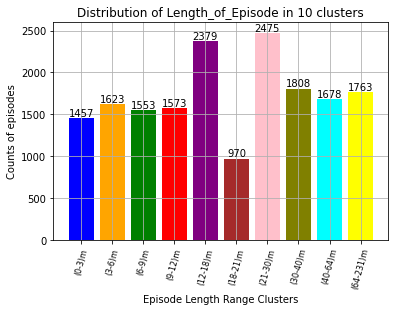

In [612]:
LOE_1 = len(final_episodes[final_episodes['Cat_LOE']==1]) 
LOE_2 = len(final_episodes[final_episodes['Cat_LOE']==2]) 
LOE_3 = len(final_episodes[final_episodes['Cat_LOE']==3]) 
LOE_4 = len(final_episodes[final_episodes['Cat_LOE']==4]) 
LOE_5 = len(final_episodes[final_episodes['Cat_LOE']==5]) 
LOE_6 = len(final_episodes[final_episodes['Cat_LOE']==6]) 
LOE_7 = len(final_episodes[final_episodes['Cat_LOE']==7]) 
LOE_8 = len(final_episodes[final_episodes['Cat_LOE']==8]) 
LOE_9 = len(final_episodes[final_episodes['Cat_LOE']==9])
LOE_10 = len(final_episodes[final_episodes['Cat_LOE']==10])  

# Categories for the x-axis
categories = ['(0-3)m', '(3-6)m', '(6-9)m', '(9-12)m', '(12-18)m', '(18-21)m', '(21-30)m', '(30-40)m', '(40-64)m', '(64-231)m']

# Counts for each category
counts = [LOE_1, LOE_2, LOE_3, LOE_4, LOE_5, LOE_6, LOE_7, LOE_8, LOE_9, LOE_10]


# Plot a grouped bar chart
bars = plt.bar(categories, counts, color = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'olive', 'cyan', 'yellow'])
plt.xlabel('Episode Length Range Clusters')
plt.ylabel('Counts of episodes')
plt.xticks(rotation=75, fontsize=8)
plt.title('Distribution of Length_of_Episode in 10 clusters')
plt.grid(True)

#plt.figure(figsize=(10, 8))
# Add count labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', fontsize=10)

plt.show()

In [613]:
grouped = final_episodes.groupby('Cat_LOE').size().reset_index(name='count')
print(grouped)

   Cat_LOE  count
0      1.0   1457
1      2.0   1623
2      3.0   1553
3      4.0   1573
4      5.0   2379
5      6.0    970
6      7.0   2475
7      8.0   1808
8      9.0   1678
9     10.0   1763


In [614]:
final_episodes[final_episodes['Cat_LOE']==11]

,pasient,episode_id,age,remaining_time_countdown,var_no_dates_permonth,gender,episode_order,islast,closingcode,aftercode,...,count_terapi,count_undersokelse,count_radge,count_behplanlegging,count_ikkemott,count_others,tillnextepisode,starttillnextstart,Length_of_Episode,Cat_LOE


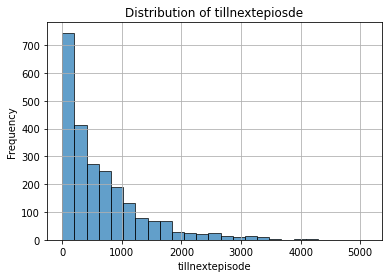

In [615]:
# look at tillnextepisode
plt.hist(final_episodes['tillnextepisode'], bins=25, edgecolor="k", alpha=0.7)
plt.xlabel("tillnextepisode")
plt.ylabel("Frequency")
plt.title("Distribution of tillnextepiosde")
plt.grid(True)
plt.show()


In [616]:
#looking at 'tillnextepiosde'
final_episodes['tillnextepisode'].describe() 

count    2367.000000
mean      662.351077
std       677.049895
min         1.000000
25%       180.000000
50%       452.000000
75%       914.000000
max      5109.000000
Name: tillnextepisode, dtype: float64

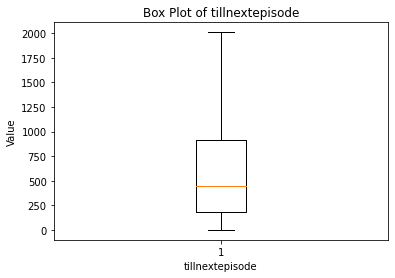

In [617]:
# Filter rows where 'tillnextepisode' is not null
tillnextepisode_series = final_episodes['tillnextepisode'].dropna()

# Creating the boxplot
plt.boxplot(tillnextepisode_series, showfliers=False)
plt.xlabel('tillnextepisode')
plt.ylabel('Value')
plt.title('Box Plot of tillnextepisode')
plt.show()

We can just predict whatever we are not blind about and whatever we can observe, we need a window, we will try different windows: 180 days, 365 days (1 year), 730 days (2 years), 1095 (3 years) – to have a better result, we need to extend the range. 

We need to drive a new output measure for binary prediction (logistic regression), “TNE_BO”: if 0<tillnextepisode<=180 , 1 else 0. 

For the rows in the dataset that have TNE_BO=1, we will also have another output measure: “TNE_NO” which is numerical continues value using in linear prediction, which will be a number between 0 and 180. 


In [618]:
#window: 180 days re-admission
mask = (0 <= final_episodes['tillnextepisode']) & (final_episodes['tillnextepisode'] <= 180)
final_episodes.loc[mask, 'TNE_BO_180'] = 1
final_episodes.loc[~mask, 'TNE_BO_180'] = 0

result1 = final_episodes[['tillnextepisode', 'TNE_BO_180']][final_episodes['TNE_BO_180']==1]
print('TNE_BO_180 results:\n', result1)

final_episodes.loc[mask, 'TNE_NO_180'] = final_episodes.loc[mask, 'tillnextepisode']
final_episodes.loc[~mask, 'TNE_NO_180'] = np.nan

result2 = final_episodes[['tillnextepisode', 'TNE_NO_180']][final_episodes['TNE_NO_180'].notnull()]
result3 = final_episodes[['tillnextepisode', 'TNE_NO_180']][final_episodes['TNE_NO_180'].isna()]
print('TNE_NO_180, not null results:\n', result2)
print('TNE_NO_180, null results:\n', result3)
 

TNE_BO_180 results:
        tillnextepisode  TNE_BO_180
81                85.0         1.0
95               178.0         1.0
102              179.0         1.0
136               87.0         1.0
147               87.0         1.0
...                ...         ...
17381            178.0         1.0
17388            178.0         1.0
17393            178.0         1.0
17399              5.0         1.0
17426             91.0         1.0

[608 rows x 2 columns]
TNE_NO_180, not null results:
        tillnextepisode  TNE_NO_180
81                85.0        85.0
95               178.0       178.0
102              179.0       179.0
136               87.0        87.0
147               87.0        87.0
...                ...         ...
17381            178.0       178.0
17388            178.0       178.0
17393            178.0       178.0
17399              5.0         5.0
17426             91.0        91.0

[608 rows x 2 columns]
TNE_NO_180, null results:
        tillnextepisode  TNE_NO_18

In [619]:
#window: 365 days (1-year) re-admission
mask = (0 <= final_episodes['tillnextepisode']) & (final_episodes['tillnextepisode'] <= 365)
final_episodes.loc[mask, 'TNE_BO_365'] = 1
final_episodes.loc[~mask, 'TNE_BO_365'] = 0

result1 = final_episodes[['tillnextepisode', 'TNE_BO_365']][final_episodes['TNE_BO_365']==1]
#print('TNE_BO_365 results:\n', result1)

final_episodes.loc[mask, 'TNE_NO_365'] = final_episodes.loc[mask, 'tillnextepisode']
final_episodes.loc[~mask, 'TNE_NO_365'] = np.nan

result2 = final_episodes[['tillnextepisode', 'TNE_NO_365']][final_episodes['TNE_NO_365'].notnull()]
result3 = final_episodes[['tillnextepisode', 'TNE_NO_365']][final_episodes['TNE_NO_365'].isna()]
#print('TNE_NO_365, not null results:\n', result2)
#print('TNE_NO_365, null results:\n', result3)
 


In [620]:
#window: 730 days (2-year) re-admission
mask = (0 <= final_episodes['tillnextepisode']) & (final_episodes['tillnextepisode'] <= 730)
final_episodes.loc[mask, 'TNE_BO_730'] = 1
final_episodes.loc[~mask, 'TNE_BO_730'] = 0

result1 = final_episodes[['tillnextepisode', 'TNE_BO_730']][final_episodes['TNE_BO_730']==1]
#print('TNE_BO_730 results:\n', result1)

final_episodes.loc[mask, 'TNE_NO_730'] = final_episodes.loc[mask, 'tillnextepisode']
final_episodes.loc[~mask, 'TNE_NO_730'] = np.nan

result2 = final_episodes[['tillnextepisode', 'TNE_NO_730']][final_episodes['TNE_NO_730'].notnull()]
result3 = final_episodes[['tillnextepisode', 'TNE_NO_730']][final_episodes['TNE_NO_730'].isna()]
#print('TNE_NO_730, not null results:\n', result2)
#print('TNE_NO_730, null results:\n', result3)

In [621]:
#window: 1095 days (3-year) re-admission
mask = (0 <= final_episodes['tillnextepisode']) & (final_episodes['tillnextepisode'] <= 1095)
final_episodes.loc[mask, 'TNE_BO_1095'] = 1
final_episodes.loc[~mask, 'TNE_BO_1095'] = 0

result1 = final_episodes[['tillnextepisode', 'TNE_BO_1095']][final_episodes['TNE_BO_1095']==1]
#print('TNE_BO_1095 results:\n', result1)

final_episodes.loc[mask, 'TNE_NO_1095'] = final_episodes.loc[mask, 'tillnextepisode']
final_episodes.loc[~mask, 'TNE_NO_1095'] = np.nan

result2 = final_episodes[['tillnextepisode', 'TNE_NO_1095']][final_episodes['TNE_NO_1095'].notnull()]
result3 = final_episodes[['tillnextepisode', 'TNE_NO_1095']][final_episodes['TNE_NO_1095'].isna()]
#print('TNE_NO_1095, not null results:\n', result2)
#print('TNE_NO_1095, null results:\n', result3)

In [622]:
final_episodes.dropna(subset=['Length_of_Episode'], inplace=True)
final_episodes.dropna(subset=['Cat_LOE'], inplace=True)


In [623]:
print('***IF 180 days**')
print(len(final_episodes[final_episodes['TNE_BO_180']==1])) # 529
print(len(final_episodes[final_episodes['TNE_BO_180']==0])) # 14,843
print(len(final_episodes[(final_episodes['TNE_BO_180'] == 0) & (final_episodes['tillnextepisode']>180)])) # have been re-admitted (not null) and bigger than 180: 1,575
print(len(final_episodes[final_episodes['tillnextepisode'].isna()])) # havent been re-admitted: 13,268
print('***IF one year**')
print(len(final_episodes[final_episodes['TNE_BO_365']==1])) # 994
print(len(final_episodes[final_episodes['TNE_BO_365']==0])) # 14,378
print(len(final_episodes[(final_episodes['TNE_BO_365'] == 0) & (final_episodes['tillnextepisode']>365)])) # have been re-admitted (not null) and bigger than 365: 1,110
print(len(final_episodes[final_episodes['tillnextepisode'].isna()])) # havent been re-admitted: 13,268
print('***IF two years**')
print(len(final_episodes[final_episodes['TNE_BO_730']==1])) # 1,425
print(len(final_episodes[final_episodes['TNE_BO_730']==0])) # 13,947
print(len(final_episodes[(final_episodes['TNE_BO_730'] == 0) & (final_episodes['tillnextepisode']>730)])) # have been re-admitted (not null) and bigger than 730: 679
print(len(final_episodes[final_episodes['tillnextepisode'].isna()])) # havent been re-admitted: 13,268
print('***IF three years**')
print(len(final_episodes[final_episodes['TNE_BO_1095']==1])) # 1,707
print(len(final_episodes[final_episodes['TNE_BO_1095']==0])) # 13,665
print(len(final_episodes[(final_episodes['TNE_BO_1095'] == 0) & (final_episodes['tillnextepisode']>1095)])) # have been re-admitted (not null) and bigger than 1095: 397
print(len(final_episodes[final_episodes['tillnextepisode'].isna()])) # havent been re-admitted: 13,268

***IF 180 days**
597
16528
1741
14787
***IF one year**
1102
16023
1236
14787
***IF two years**
1578
15547
760
14787
***IF three years**
1894
15231
444
14787


<Figure size 864x576 with 0 Axes>

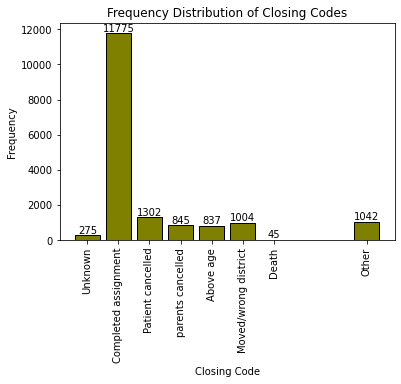

In [624]:
def custom_labels(label):
    label_mapping = {
        0: 'Unknown',
        1: 'Completed assignment',
        2: 'Patient cancelled',
        3: 'parents cancelled',
        4: 'Above age',
        5: 'Moved/wrong district',
        6: 'Death',
        7: 'Rejection',
        8: 'Did not get started',
        9: 'Other'
    }
    return label_mapping.get(label, label)

plt.figure(figsize=(12, 8))

counts = final_episodes['closingcode'].value_counts()
counts = counts.sort_index()
fig, ax = plt.subplots()
bars = ax.bar(counts.index, counts.values, color='olive', edgecolor='black')

plt.xlabel('Closing Code', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Frequency Distribution of Closing Codes', fontsize=12)
plt.xticks(counts.index, [custom_labels(label) for label in counts.index], rotation=90)

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.show()

<Figure size 864x576 with 0 Axes>

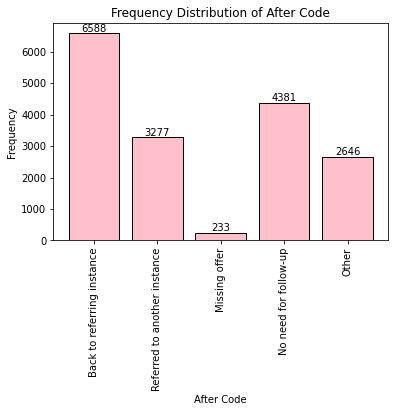

In [625]:
# after code
def custom_labels(label):
    label_mapping = {
        1: 'Back to referring instance',
        2: 'Referred to another instance',
        3: 'Missing offer',
        4: 'No need for follow-up',
        5: 'Other' # what is it?
    }
    return label_mapping.get(label, label)

plt.figure(figsize=(12, 8))

counts = final_episodes['aftercode'].value_counts()
counts = counts.sort_index()
fig, ax = plt.subplots()
bars = ax.bar(counts.index, counts.values, color='pink', edgecolor='black')

plt.xlabel('After Code', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Frequency Distribution of After Code', fontsize=12)
plt.xticks(counts.index, [custom_labels(label) for label in counts.index], rotation=90)

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.show()


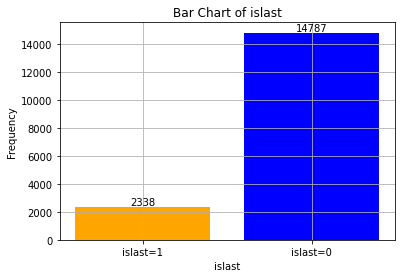

In [626]:
islast_counts = final_episodes['islast'].value_counts()

# Plot a bar chart
bars = plt.bar(islast_counts.index, islast_counts.values, tick_label=['islast=0', 'islast=1'], color=['blue', 'orange'])
plt.xlabel('islast')
plt.ylabel('Frequency')
plt.title('Bar Chart of islast')
plt.grid(True)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', color='black')

plt.show()

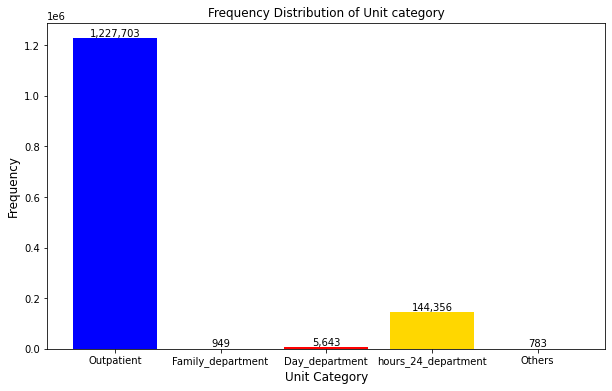

In [627]:
#Unit Category, count of care sessions, care intervals
Outpatient = final_episodes['count_poliklinikk'].sum() 
Family_department = final_episodes['count_familieavdeling'].sum() 
Day_department = final_episodes['count_dagavdeling'].sum() 
hours_24_department = final_episodes['count_dognavdeling'].sum() 
Others = final_episodes['count_osv'].sum()

plt.figure(figsize=(10, 6))

data = [Outpatient, Family_department, Day_department, hours_24_department, Others]
#data = [1869842, 198953, 6120, 959, 829]
labels = ['Outpatient', 'Family_department', 'Day_department', 'hours_24_department','Others']
colors = ['blue', 'green', 'red', 'gold', 'pink'] 

bars = plt.bar(labels, data, color=colors)

plt.xlabel('Unit Category', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Frequency Distribution of Unit category', fontsize=12)

for bar in bars:
    yval = bar.get_height()
    formatted_yval = "{:,.0f}".format(yval) 
    plt.text(bar.get_x() + bar.get_width()/2, yval, formatted_yval, ha='center', va='bottom', color='black')
plt.show()


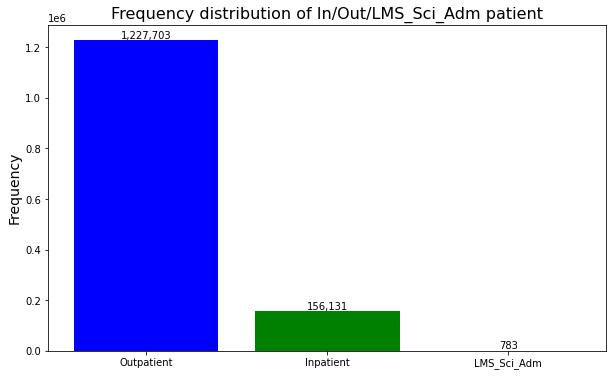

In [628]:
#in/out/else patient episode
outpatient = final_episodes['count_outpatient'].sum() #1869842
inpatient = final_episodes['count_inpatient'].sum() #211240
LMS_Sci_Adm = final_episodes['count_lmssciadm'].sum() #829

plt.figure(figsize=(10, 6))

data = [outpatient, inpatient, LMS_Sci_Adm]
labels = ['Outpatient','Inpatient','LMS_Sci_Adm']
colors = ['blue', 'green', 'red']
bars = plt.bar(labels, data, color=colors)  

#plt.xlabel('in/out/else patient', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Frequency distribution of In/Out/LMS_Sci_Adm patient', fontsize=16)

for bar in bars:
    yval = bar.get_height()
    formatted_yval = "{:,.0f}".format(yval) 
    plt.text(bar.get_x() + bar.get_width()/2, yval, formatted_yval, ha='center', va='bottom', color='black')
plt.show()

#how many days, inpatients 


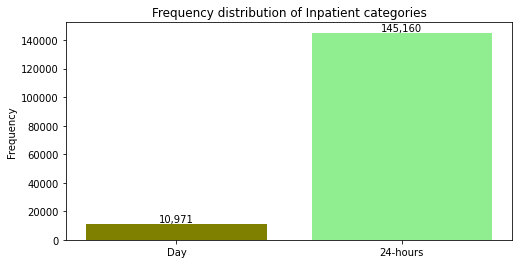

In [629]:
#Inpatient categories
inpatient_day = final_episodes['count_inpatient_day'].sum() #11458
inpatient_24_hours = final_episodes['count_inpatient_daynight'].sum() #199782

plt.figure(figsize=(8, 4))

data = [inpatient_day, inpatient_24_hours]
labels = ['Day', '24-hours']
colors = ['olive', 'lightgreen']
bars = plt.bar(labels, data, color=colors)  

#plt.xlabel('in/out/else patient', fontsize=14)
plt.ylabel('Frequency', fontsize=10)
plt.title('Frequency distribution of Inpatient categories', fontsize=12)

for bar in bars:
    yval = bar.get_height()
    formatted_yval = "{:,.0f}".format(yval) 
    plt.text(bar.get_x() + bar.get_width()/2, yval, formatted_yval, ha='center', va='bottom', color='black')
plt.show()


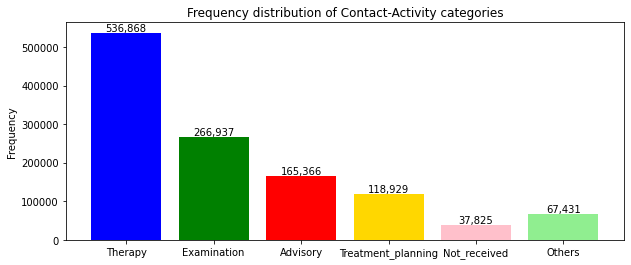

In [630]:
#Contact-activity categories
Therapy = final_episodes['count_terapi'].sum() #796,913
Examination = final_episodes['count_undersokelse'].sum() #413,850
Advisory = final_episodes['count_radge'].sum() #234,289
Treatment_planning = final_episodes['count_behplanlegging'].sum() #182,555
Not_received = final_episodes['count_ikkemott'].sum() #56,560
Others = final_episodes['count_others'].sum() #109,053

plt.figure(figsize=(10, 4))

data = [Therapy, Examination, Advisory, Treatment_planning, Not_received, Others]
labels = ['Therapy', 'Examination', 'Advisory', 'Treatment_planning', 'Not_received', 'Others']
colors = ['blue', 'green', 'red', 'gold', 'pink', 'lightgreen'] 
bars = plt.bar(labels, data, color=colors)  

plt.ylabel('Frequency', fontsize=10)
plt.title('Frequency distribution of Contact-Activity categories', fontsize=12)

for bar in bars:
    yval = bar.get_height()
    formatted_yval = "{:,.0f}".format(yval) 
    plt.text(bar.get_x() + bar.get_width()/2, yval, formatted_yval, ha='center', va='bottom', color='black')
plt.show()


In [631]:
final_episodes.head()

,pasient,episode_id,age,remaining_time_countdown,var_no_dates_permonth,gender,episode_order,islast,closingcode,aftercode,...,Length_of_Episode,Cat_LOE,TNE_BO_180,TNE_NO_180,TNE_BO_365,TNE_NO_365,TNE_BO_730,TNE_NO_730,TNE_BO_1095,TNE_NO_1095
0,2.0,3836.0,12.0,20.0,1.040000,F,1.0,1.0,1.0,1.0,...,732.0,7.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
1,6.0,24660.0,6.0,116.0,1.233893,M,1.0,1.0,3.0,5.0,...,1009.0,8.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
2,7.0,22380.0,8.0,5.0,1.459513,M,1.0,1.0,1.0,1.0,...,375.0,5.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
3,8.0,28188.0,16.0,146.0,1.131371,F,1.0,1.0,1.0,4.0,...,742.0,7.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
4,10.0,7441.0,17.0,95.0,1.581139,F,1.0,1.0,1.0,5.0,...,92.0,2.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN


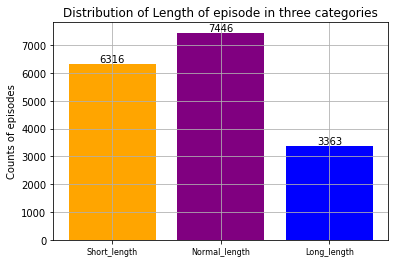

In [632]:
Short_length  = len(final_episodes[final_episodes['Length_of_Episode']<=365]) #(0-12)m ~ (0-365)day #less than 1 year
Normal_length = len(final_episodes[(final_episodes['Length_of_Episode']>365) & (final_episodes['Length_of_Episode']<=1200)]) #(3-40)m ~ (90-1200)days #between 1 to 3.33 years
Long_length = len(final_episodes[final_episodes['Length_of_Episode']>1200]) #more than 3.33 years

counts = [Short_length, Normal_length, Long_length]
categories = ['Short_length', 'Normal_length', 'Long_length']

# Plot a grouped bar chart
bars = plt.bar(categories, counts, color = ['orange','purple','blue'])

plt.ylabel('Counts of episodes')
plt.xticks(fontsize=8)
plt.title('Distribution of Length of episode in three categories')
plt.grid(True)


# Add count labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', fontsize=10)

plt.show()

In [633]:
final_episodes['Length_of_Episode'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
17273    False
17274    False
17275    False
17276    False
17278    False
Name: Length_of_Episode, Length: 17125, dtype: bool

In [634]:
print("Number of null values before drop:", final_episodes['Length_of_Episode'].isnull().sum())
print("Number of NaN values before drop:", final_episodes['Length_of_Episode'].isna())
final_episodes.dropna(subset=['Length_of_Episode'], inplace=True)
print("Number of null values after drop:", final_episodes['Length_of_Episode'].isnull().sum())
print("Number of NaN values after drop:", final_episodes['Length_of_Episode'].isna())


Number of null values before drop: 0
Number of NaN values before drop: 0        False
1        False
2        False
3        False
4        False
         ...  
17273    False
17274    False
17275    False
17276    False
17278    False
Name: Length_of_Episode, Length: 17125, dtype: bool
Number of null values after drop: 0
Number of NaN values after drop: 0        False
1        False
2        False
3        False
4        False
         ...  
17273    False
17274    False
17275    False
17276    False
17278    False
Name: Length_of_Episode, Length: 17125, dtype: bool


In [635]:
final_episodes["Length_of_Episode"].astype(int)

0         732
1        1009
2         375
3         742
4          92
         ... 
17273    3204
17274     278
17275    1187
17276     182
17278    3655
Name: Length_of_Episode, Length: 17125, dtype: int64

In [636]:
if 'Cat_LOE_desc' in final_episodes.columns:
    final_episodes.drop(columns=['Cat_LOE_desc'], inplace=True)


In [637]:
# Define the bin edges and labels
bin_edges = [-float('inf'), 365, 1200, float('inf')]
bin_labels = [1, 2, 3]

# Apply the categorization
final_episodes['Cat_LOE_desc'] = pd.cut(final_episodes['Length_of_Episode'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# If you want to handle the 'else' case separately (setting it to 1000), you can use fillna
#final_episodes['Cat_LOE_desc'] = final_episodes['Cat_LOE_desc'].fillna(1000).astype(int)


In [638]:
final_episodes.columns

Index(['pasient', 'episode_id', 'age', 'remaining_time_countdown',
       'var_no_dates_permonth', 'gender', 'episode_order', 'islast',
       'closingcode', 'aftercode', 'instanskode', 'episode_start_date',
       'episode_end_date', 'count_poliklinikk', 'count_familieavdeling',
       'count_dagavdeling', 'count_dognavdeling', 'count_osv',
       'count_outpatient', 'count_inpatient', 'count_lmssciadm',
       'count_inpatient_day', 'count_inpatient_daynight', 'count_terapi',
       'count_undersokelse', 'count_radge', 'count_behplanlegging',
       'count_ikkemott', 'count_others', 'tillnextepisode',
       'starttillnextstart', 'Length_of_Episode', 'Cat_LOE', 'TNE_BO_180',
       'TNE_NO_180', 'TNE_BO_365', 'TNE_NO_365', 'TNE_BO_730', 'TNE_NO_730',
       'TNE_BO_1095', 'TNE_NO_1095', 'Cat_LOE_desc'],
      dtype='object')

In [639]:
final_episodes.dropna(subset=["Length_of_Episode"], inplace=True)

In [640]:
len(final_episodes[final_episodes["Length_of_Episode"].isna()])

0

In [641]:
len(final_episodes)

17125

In [642]:
# making feature count visit that is count of patients contacts in Journal
final_episodes['Count_visit'] = final_episodes['count_inpatient'] + final_episodes['count_outpatient']

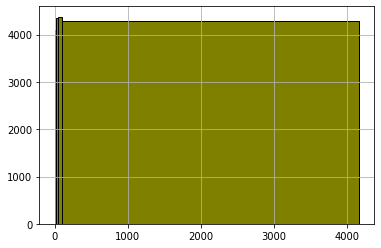

In [643]:
import matplotlib.pyplot as plt
min_length = final_episodes['Count_visit'].min()
max_length = final_episodes['Count_visit'].max()
#define function to calculate equal-frequency bins 
def equalbs(x, nbin):
    nlen = len(x)
    return np.interp(np.linspace(0, nlen, nbin + 1),
                     np.arange(nlen),
                     np.sort(x))

#create histogram with equal-frequency bins 
n, bins, patches = plt.hist(final_episodes['Count_visit'], equalbs(final_episodes['Count_visit'], 4), edgecolor='black', color='olive')
#plt.xlim(min_length, max_length)
plt.grid(True)
plt.show()

In [644]:
bins

array([   0.,   14.,   44.,  102., 4159.])

In [645]:
import pandas as pd

# Assuming 'your_dataframe' is the name of your DataFrame
# Replace 'your_dataframe' with the actual name of your DataFrame

# Define the bin edges based on the percentiles you provided
bin_edges = [0, 1, 14, 44, 102, float('inf')]  # Adjust the intervals as needed

# Define the corresponding labels for each category
bin_labels = ['1', '2', '3', '4', '5']

# Use pd.cut to create the "Cat_CV" column with the specified categories
final_episodes['Cat_CV'] = pd.cut(final_episodes['Count_visit'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Display the resulting DataFrame
print(final_episodes[['Count_visit', 'Cat_CV']])


       Count_visit Cat_CV
0             49.0      4
1             98.0      4
2             80.0      4
3             52.0      4
4             41.0      3
...            ...    ...
17273        101.0      4
17274         32.0      3
17275        396.0      5
17276          2.0      2
17278        161.0      5

[17125 rows x 2 columns]


for i in range(len(final_episodes['Count_visit'])):
    if final_episodes.iloc[i]['Count_visit'] == 0: # 0
        final_episodes.loc[i, 'Cat_CV'] = 0
    elif final_episodes.iloc[i]['Count_visit'] > 100: # more than 100
        final_episodes.loc[i, 'Cat_CV'] = 4
    elif 50 < final_episodes.iloc[i]['Count_visit'] <= 100: # 50-100 visits
        final_episodes.loc[i, 'Cat_CV'] = 3
    elif 15 < final_episodes.iloc[i]['Count_visit'] <= 50: # 15-50 visits
        final_episodes.loc[i, 'Cat_CV'] = 2 
    elif 1 <= final_episodes.iloc[i]['Count_visit'] <= 15: # 1-15 visits
        final_episodes.loc[i, 'Cat_CV'] = 1


In [646]:
len(final_episodes[final_episodes['Cat_CV']==0]) #288
len(final_episodes[final_episodes['Cat_CV']==1]) #4096
len(final_episodes[final_episodes['Cat_CV']==2]) #4207
len(final_episodes[final_episodes['Cat_CV']==3]) #3248
len(final_episodes[final_episodes['Cat_CV']==4]) #3821

0

In [647]:
# making a new feature
final_episodes['C_service_visit'] = final_episodes['count_terapi'] + final_episodes['count_undersokelse'] + final_episodes['count_radge'] + final_episodes['count_behplanlegging']
# converting continuous values for Variable "C_service_visit" to be as one-hot encoding categories 
final_episodes['Therapy_ratio'] = (final_episodes['count_terapi']/final_episodes['C_service_visit']).astype(float).round(3)
final_episodes['Examination_ratio'] = (final_episodes['count_undersokelse']/final_episodes['C_service_visit']).astype(float).round(3)
final_episodes['Advisory_ratio'] = (final_episodes['count_radge']/final_episodes['C_service_visit']).astype(float).round(3)
final_episodes['TreatmentPlanning_ratio'] = (final_episodes['count_behplanlegging']/final_episodes['C_service_visit']).astype(float).round(3)

In [648]:
# making some features with value between 0 and 1
final_episodes['Outpatient_ratio'] = (final_episodes['count_outpatient']/final_episodes['Count_visit']).astype(float).round(3)
final_episodes['Inpatient_ratio'] = (final_episodes['count_inpatient']/final_episodes['Count_visit']).astype(float).round(3)

In [649]:
# making some features with value between 0 and 1
final_episodes['Inpatient_day_ratio'] = (final_episodes['count_inpatient_day']/final_episodes['count_inpatient']).astype(float).round(3)
final_episodes['Inpatient_daynight_ratio'] = (final_episodes['count_inpatient_daynight']/final_episodes['count_inpatient']).astype(float).round(3)

In [650]:
final_episodes['Care_intensity'] = final_episodes['Count_visit'] / final_episodes['Length_of_Episode']

In [651]:
final_episodes.columns

Index(['pasient', 'episode_id', 'age', 'remaining_time_countdown',
       'var_no_dates_permonth', 'gender', 'episode_order', 'islast',
       'closingcode', 'aftercode', 'instanskode', 'episode_start_date',
       'episode_end_date', 'count_poliklinikk', 'count_familieavdeling',
       'count_dagavdeling', 'count_dognavdeling', 'count_osv',
       'count_outpatient', 'count_inpatient', 'count_lmssciadm',
       'count_inpatient_day', 'count_inpatient_daynight', 'count_terapi',
       'count_undersokelse', 'count_radge', 'count_behplanlegging',
       'count_ikkemott', 'count_others', 'tillnextepisode',
       'starttillnextstart', 'Length_of_Episode', 'Cat_LOE', 'TNE_BO_180',
       'TNE_NO_180', 'TNE_BO_365', 'TNE_NO_365', 'TNE_BO_730', 'TNE_NO_730',
       'TNE_BO_1095', 'TNE_NO_1095', 'Cat_LOE_desc', 'Count_visit', 'Cat_CV',
       'C_service_visit', 'Therapy_ratio', 'Examination_ratio',
       'Advisory_ratio', 'TreatmentPlanning_ratio', 'Outpatient_ratio',
       'Inpatient_ratio

In [652]:
#drop the columns that we dont need
final_episodes.drop(['instanskode', 'count_poliklinikk', 'count_familieavdeling', 'count_dagavdeling', 'count_dognavdeling', 'count_osv',
       'count_outpatient', 'count_inpatient', 'count_lmssciadm','count_inpatient_day', 'count_inpatient_daynight', 'count_terapi',
       'count_undersokelse', 'count_radge', 'count_behplanlegging','count_ikkemott', 'count_others','starttillnextstart', 'C_service_visit'], axis=1, inplace= True)

In [653]:
final_episodes.iloc[2, :]

pasient                            7.0
episode_id                     22380.0
age                                8.0
remaining_time_countdown           5.0
var_no_dates_permonth         1.459513
gender                               M
episode_order                      1.0
islast                             1.0
closingcode                        1.0
aftercode                          1.0
episode_start_date          2015-09-28
episode_end_date            2016-10-06
tillnextepisode                    NaN
Length_of_Episode                375.0
Cat_LOE                            5.0
TNE_BO_180                         0.0
TNE_NO_180                         NaN
TNE_BO_365                         0.0
TNE_NO_365                         NaN
TNE_BO_730                         0.0
TNE_NO_730                         NaN
TNE_BO_1095                        0.0
TNE_NO_1095                        NaN
Cat_LOE_desc                         2
Count_visit                       80.0
Cat_CV                   

In [654]:
final_episodes.dropna(subset=["Length_of_Episode"], inplace=True)
final_episodes.dropna(subset=["Cat_LOE"], inplace=True)

In [655]:
len(final_episodes) 

17125

In [656]:
final_episodes.loc[final_episodes["age"].between(0, 5), ["age_group"]] = "Preschooler"
final_episodes.loc[final_episodes["age"].between(6, 11), ["age_group"]] = "MiddleChildhood"
final_episodes.loc[final_episodes["age"].between(12, 18), ["age_group"]] = "Teenager" 
final_episodes.loc[final_episodes["age"].between(19, 60), ["age_group"]] = "Adult"

In [657]:
final_episodes.columns

Index(['pasient', 'episode_id', 'age', 'remaining_time_countdown',
       'var_no_dates_permonth', 'gender', 'episode_order', 'islast',
       'closingcode', 'aftercode', 'episode_start_date', 'episode_end_date',
       'tillnextepisode', 'Length_of_Episode', 'Cat_LOE', 'TNE_BO_180',
       'TNE_NO_180', 'TNE_BO_365', 'TNE_NO_365', 'TNE_BO_730', 'TNE_NO_730',
       'TNE_BO_1095', 'TNE_NO_1095', 'Cat_LOE_desc', 'Count_visit', 'Cat_CV',
       'Therapy_ratio', 'Examination_ratio', 'Advisory_ratio',
       'TreatmentPlanning_ratio', 'Outpatient_ratio', 'Inpatient_ratio',
       'Inpatient_day_ratio', 'Inpatient_daynight_ratio', 'Care_intensity',
       'age_group'],
      dtype='object')

In [658]:
final_episodes.to_csv("/home/kabank/workbench/.conda/analysis/kabank-data/final_episodes.csv", index=False)

In [659]:
final_episodes1 = final_episodes.copy()
final_episodes1['closingcode'] = final_episodes1['closingcode'].astype(int)

In [660]:
for index, row in final_episodes1.iterrows():
    if row['closingcode'] == 0:
        final_episodes1.at[index, 'closingcode'] = 'closingcode_0'
    elif row['closingcode'] == 1:
        final_episodes1.at[index, 'closingcode'] = 'closingcode_1'
    elif row['closingcode'] == 2:
        final_episodes1.at[index, 'closingcode'] = 'closingcode_2'
    elif row['closingcode'] == 3:
        final_episodes1.at[index, 'closingcode'] = 'closingcode_3'
    elif row['closingcode'] == 4:
        final_episodes1.at[index, 'closingcode'] = 'closingcode_4'
    elif row['closingcode'] == 5:
        final_episodes1.at[index, 'closingcode'] = 'closingcode_5'
    elif row['closingcode'] == 6:
        final_episodes1.at[index, 'closingcode'] = 'closingcode_6'
    elif row['closingcode'] == 7:
        final_episodes1.at[index, 'closingcode'] = 'closingcode_7'
    elif row['closingcode'] == 8:
        final_episodes1.at[index, 'closingcode'] = 'closingcode_8'
    elif row['closingcode'] == 9:
        final_episodes1.at[index, 'closingcode'] = 'closingcode_9'
    else:
        final_episodes1.at[index, 'closingcode'] = 'xxxxxx'


In [661]:
for index, row in final_episodes1.iterrows():
    if row['aftercode'] == 0:
        final_episodes1.at[index, 'aftercode'] = 'aftercode_0'
    elif row['aftercode'] == 1:
        final_episodes1.at[index, 'aftercode'] = 'aftercode_1'
    elif row['aftercode'] == 2:
        final_episodes1.at[index, 'aftercode'] = 'aftercode_2'
    elif row['aftercode'] == 3:
        final_episodes1.at[index, 'aftercode'] = 'aftercode_3'
    elif row['aftercode'] == 4:
        final_episodes1.at[index, 'aftercode'] = 'aftercode_4'
    elif row['aftercode'] == 5:
        final_episodes1.at[index, 'aftercode'] = 'aftercode_5'
    else:
        final_episodes1.at[index, 'aftercode'] = 'xxxxxx'


In [662]:
final_episodes1.columns

Index(['pasient', 'episode_id', 'age', 'remaining_time_countdown',
       'var_no_dates_permonth', 'gender', 'episode_order', 'islast',
       'closingcode', 'aftercode', 'episode_start_date', 'episode_end_date',
       'tillnextepisode', 'Length_of_Episode', 'Cat_LOE', 'TNE_BO_180',
       'TNE_NO_180', 'TNE_BO_365', 'TNE_NO_365', 'TNE_BO_730', 'TNE_NO_730',
       'TNE_BO_1095', 'TNE_NO_1095', 'Cat_LOE_desc', 'Count_visit', 'Cat_CV',
       'Therapy_ratio', 'Examination_ratio', 'Advisory_ratio',
       'TreatmentPlanning_ratio', 'Outpatient_ratio', 'Inpatient_ratio',
       'Inpatient_day_ratio', 'Inpatient_daynight_ratio', 'Care_intensity',
       'age_group'],
      dtype='object')

In [663]:
len(final_episodes1[final_episodes1['gender']=='0'])

30

In [664]:
# Binarize and one-hot encode 
lb = LabelBinarizer()
ohe = OneHotEncoder()

# 'closingcode' is a column with categorical values
binarized_closingcode = pd.DataFrame(lb.fit_transform(final_episodes1['closingcode']),
                                      columns=lb.classes_,
                                      index=final_episodes1.index)

final_episodes1 = pd.concat([final_episodes1, binarized_closingcode], axis=1)

# 'aftercode' is a column with categorical values
binarized_aftercode = pd.DataFrame(lb.fit_transform(final_episodes1['aftercode']),
                                      columns=lb.classes_,
                                      index=final_episodes1.index)

final_episodes1 = pd.concat([final_episodes1, binarized_aftercode], axis=1)


 # 'gender' is a column with categorical values
binarized_gender = pd.DataFrame(lb.fit_transform(final_episodes1['gender']),
                                      columns=lb.classes_,
                                      index=final_episodes1.index)
final_episodes1 = pd.concat([final_episodes1, binarized_gender], axis=1)

# 'age_group' is a column with categorical values
binarized_age_group = pd.DataFrame(lb.fit_transform(final_episodes1['age_group']),
                                      columns=lb.classes_,
                                      index=final_episodes1.index)                                     

final_episodes1 = pd.concat([final_episodes1, binarized_age_group], axis=1)
final_episodes1.rename(columns={'0': 'gender_0'}, inplace=True)
# Print the columns of the updated DataFrame
print(final_episodes1.columns)

Index(['pasient', 'episode_id', 'age', 'remaining_time_countdown',
       'var_no_dates_permonth', 'gender', 'episode_order', 'islast',
       'closingcode', 'aftercode', 'episode_start_date', 'episode_end_date',
       'tillnextepisode', 'Length_of_Episode', 'Cat_LOE', 'TNE_BO_180',
       'TNE_NO_180', 'TNE_BO_365', 'TNE_NO_365', 'TNE_BO_730', 'TNE_NO_730',
       'TNE_BO_1095', 'TNE_NO_1095', 'Cat_LOE_desc', 'Count_visit', 'Cat_CV',
       'Therapy_ratio', 'Examination_ratio', 'Advisory_ratio',
       'TreatmentPlanning_ratio', 'Outpatient_ratio', 'Inpatient_ratio',
       'Inpatient_day_ratio', 'Inpatient_daynight_ratio', 'Care_intensity',
       'age_group', 'closingcode_0', 'closingcode_1', 'closingcode_2',
       'closingcode_3', 'closingcode_4', 'closingcode_5', 'closingcode_6',
       'closingcode_9', 'aftercode_1', 'aftercode_2', 'aftercode_3',
       'aftercode_4', 'aftercode_5', 'gender_0', 'F', 'M', 'MiddleChildhood',
       'Preschooler', 'Teenager'],
      dtype='object'

In [665]:
final_episodes1.to_csv("/home/kabank/workbench/.conda/analysis/kabank-data/final_episodes-OneHotet.csv", index=False)

# Adding some more features like count of diagnoses and medications

In [666]:
# Data input
df = pd.read_csv("/home/kabank/workbench/.conda/analysis/kabank-data/diagnoses_atc_episode.csv")

In [667]:
df.shape #(17798, 4)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17798 entries, 0 to 17797
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   episode_id  17798 non-null  float64
 1   diagnoses   17798 non-null  object 
 2   atc_codes   17798 non-null  object 
 3   diag_atc    17798 non-null  object 
dtypes: float64(1), object(3)
memory usage: 556.3+ KB


In [668]:
df.head()

,episode_id,diagnoses,atc_codes,diag_atc
0,4.0,"['3131', '1019', '327']",[],"['3131', '1019', '327']"
1,6.0,['3001'],[],['3001']
2,7.0,['2781'],[],['2781']
3,8.0,['29622'],[],['29622']
4,9.0,"['304', '295', '29622']",['999140601'],"['304', '295', '29622', '999140601']"


In [669]:
# calculate and add column 'num_diagnoses'
df['num_diagnoses'] = df['diagnoses'].str.strip('[]').str.split(',').apply(len)


In [670]:
# calculate and add column 'num_medications'
import ast

def count_items(s):
    try:
        items = ast.literal_eval(s)
        return len(items)
    except (SyntaxError, ValueError):
        return 0

df['num_medications'] = df['atc_codes'].apply(count_items)


In [671]:
df['num_medications'].max() # min:0, max=7
df['num_diagnoses'].min() # min:1, max=10

1

In [672]:
df.columns

Index(['episode_id', 'diagnoses', 'atc_codes', 'diag_atc', 'num_diagnoses',
       'num_medications'],
      dtype='object')

In [673]:
ddf = df[['episode_id','num_diagnoses', 'num_medications']].astype(int)

In [674]:
#merging other features with number of diagnoses and medications
final_episodes2 = pd.merge(ddf, final_episodes1, on='episode_id', how='right')

In [675]:
print(len(final_episodes2)) #15372
final_episodes2.columns

17125


Index(['episode_id', 'num_diagnoses', 'num_medications', 'pasient', 'age',
       'remaining_time_countdown', 'var_no_dates_permonth', 'gender',
       'episode_order', 'islast', 'closingcode', 'aftercode',
       'episode_start_date', 'episode_end_date', 'tillnextepisode',
       'Length_of_Episode', 'Cat_LOE', 'TNE_BO_180', 'TNE_NO_180',
       'TNE_BO_365', 'TNE_NO_365', 'TNE_BO_730', 'TNE_NO_730', 'TNE_BO_1095',
       'TNE_NO_1095', 'Cat_LOE_desc', 'Count_visit', 'Cat_CV', 'Therapy_ratio',
       'Examination_ratio', 'Advisory_ratio', 'TreatmentPlanning_ratio',
       'Outpatient_ratio', 'Inpatient_ratio', 'Inpatient_day_ratio',
       'Inpatient_daynight_ratio', 'Care_intensity', 'age_group',
       'closingcode_0', 'closingcode_1', 'closingcode_2', 'closingcode_3',
       'closingcode_4', 'closingcode_5', 'closingcode_6', 'closingcode_9',
       'aftercode_1', 'aftercode_2', 'aftercode_3', 'aftercode_4',
       'aftercode_5', 'gender_0', 'F', 'M', 'MiddleChildhood', 'Preschooler

In [676]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)

In [677]:
final_episodes2.iloc[2, :]

episode_id                          22380.0
num_diagnoses                           1.0
num_medications                         0.0
pasient                                 7.0
age                                     8.0
remaining_time_countdown                5.0
var_no_dates_permonth              1.459513
gender                                    M
episode_order                           1.0
islast                                  1.0
closingcode                   closingcode_1
aftercode                       aftercode_1
episode_start_date               2015-09-28
episode_end_date                 2016-10-06
tillnextepisode                         NaN
Length_of_Episode                     375.0
Cat_LOE                                 5.0
TNE_BO_180                              0.0
TNE_NO_180                              NaN
TNE_BO_365                              0.0
TNE_NO_365                              NaN
TNE_BO_730                              0.0
TNE_NO_730                      

In [678]:
final_episodes2[final_episodes2['Length_of_Episode']<=0]

,episode_id,num_diagnoses,num_medications,pasient,age,remaining_time_countdown,var_no_dates_permonth,gender,episode_order,islast,...,aftercode_2,aftercode_3,aftercode_4,aftercode_5,gender_0,F,M,MiddleChildhood,Preschooler,Teenager


In [679]:
final_episodes2[final_episodes2['tillnextepisode']<0]

,episode_id,num_diagnoses,num_medications,pasient,age,remaining_time_countdown,var_no_dates_permonth,gender,episode_order,islast,...,aftercode_2,aftercode_3,aftercode_4,aftercode_5,gender_0,F,M,MiddleChildhood,Preschooler,Teenager


In [680]:
if 'final_episodes4' in locals():
    del final_episodes4
final_episodes4 = final_episodes2.copy()
len(final_episodes4)

17125

In [681]:
final_episodes4.columns

Index(['episode_id', 'num_diagnoses', 'num_medications', 'pasient', 'age',
       'remaining_time_countdown', 'var_no_dates_permonth', 'gender',
       'episode_order', 'islast', 'closingcode', 'aftercode',
       'episode_start_date', 'episode_end_date', 'tillnextepisode',
       'Length_of_Episode', 'Cat_LOE', 'TNE_BO_180', 'TNE_NO_180',
       'TNE_BO_365', 'TNE_NO_365', 'TNE_BO_730', 'TNE_NO_730', 'TNE_BO_1095',
       'TNE_NO_1095', 'Cat_LOE_desc', 'Count_visit', 'Cat_CV', 'Therapy_ratio',
       'Examination_ratio', 'Advisory_ratio', 'TreatmentPlanning_ratio',
       'Outpatient_ratio', 'Inpatient_ratio', 'Inpatient_day_ratio',
       'Inpatient_daynight_ratio', 'Care_intensity', 'age_group',
       'closingcode_0', 'closingcode_1', 'closingcode_2', 'closingcode_3',
       'closingcode_4', 'closingcode_5', 'closingcode_6', 'closingcode_9',
       'aftercode_1', 'aftercode_2', 'aftercode_3', 'aftercode_4',
       'aftercode_5', 'gender_0', 'F', 'M', 'MiddleChildhood', 'Preschooler

In [682]:
final_episodes4[['episode_id', 'tillnextepisode', 'TNE_BO_180',
       'TNE_NO_180', 'TNE_BO_365', 'TNE_NO_365', 'TNE_BO_730', 'TNE_NO_730',
       'TNE_BO_1095', 'TNE_NO_1095',]][final_episodes4['tillnextepisode']>0]

,episode_id,tillnextepisode,TNE_BO_180,TNE_NO_180,TNE_BO_365,TNE_NO_365,TNE_BO_730,TNE_NO_730,TNE_BO_1095,TNE_NO_1095
8,7847.0,361.0,0.0,NaN,1.0,361.0,1.0,361.0,1.0,361.0
30,4564.0,1552.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
35,21502.0,550.0,0.0,NaN,0.0,NaN,1.0,550.0,1.0,550.0
45,6700.0,453.0,0.0,NaN,0.0,NaN,1.0,453.0,1.0,453.0
55,29097.0,825.0,0.0,NaN,0.0,NaN,0.0,NaN,1.0,825.0
...,...,...,...,...,...,...,...,...,...,...
17104,2751.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
17106,17994.0,176.0,1.0,176.0,1.0,176.0,1.0,176.0,1.0,176.0
17112,24031.0,91.0,1.0,91.0,1.0,91.0,1.0,91.0,1.0,91.0
17115,4161.0,87.0,1.0,87.0,1.0,87.0,1.0,87.0,1.0,87.0


In [683]:
#final_episodes4 = final_episode4.drop(['pasient', 'episode_order', 'islast', 'closingcode', 'aftercode',  
 #      'episode_start_date', 'episode_end_date','Length_of_Episode','tillnextepisode','Count_visit', 'Cat_LOE_desc', 'Cat_TNE_desc'], axis=1)

In [684]:
final_episodes4.iloc[2,:]

episode_id                          22380.0
num_diagnoses                           1.0
num_medications                         0.0
pasient                                 7.0
age                                     8.0
remaining_time_countdown                5.0
var_no_dates_permonth              1.459513
gender                                    M
episode_order                           1.0
islast                                  1.0
closingcode                   closingcode_1
aftercode                       aftercode_1
episode_start_date               2015-09-28
episode_end_date                 2016-10-06
tillnextepisode                         NaN
Length_of_Episode                     375.0
Cat_LOE                                 5.0
TNE_BO_180                              0.0
TNE_NO_180                              NaN
TNE_BO_365                              0.0
TNE_NO_365                              NaN
TNE_BO_730                              0.0
TNE_NO_730                      

In [685]:
final_episodes4.columns

Index(['episode_id', 'num_diagnoses', 'num_medications', 'pasient', 'age',
       'remaining_time_countdown', 'var_no_dates_permonth', 'gender',
       'episode_order', 'islast', 'closingcode', 'aftercode',
       'episode_start_date', 'episode_end_date', 'tillnextepisode',
       'Length_of_Episode', 'Cat_LOE', 'TNE_BO_180', 'TNE_NO_180',
       'TNE_BO_365', 'TNE_NO_365', 'TNE_BO_730', 'TNE_NO_730', 'TNE_BO_1095',
       'TNE_NO_1095', 'Cat_LOE_desc', 'Count_visit', 'Cat_CV', 'Therapy_ratio',
       'Examination_ratio', 'Advisory_ratio', 'TreatmentPlanning_ratio',
       'Outpatient_ratio', 'Inpatient_ratio', 'Inpatient_day_ratio',
       'Inpatient_daynight_ratio', 'Care_intensity', 'age_group',
       'closingcode_0', 'closingcode_1', 'closingcode_2', 'closingcode_3',
       'closingcode_4', 'closingcode_5', 'closingcode_6', 'closingcode_9',
       'aftercode_1', 'aftercode_2', 'aftercode_3', 'aftercode_4',
       'aftercode_5', 'gender_0', 'F', 'M', 'MiddleChildhood', 'Preschooler

In [686]:
final_episodes4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   episode_id                17125 non-null  float64 
 1   num_diagnoses             11148 non-null  float64 
 2   num_medications           11148 non-null  float64 
 3   pasient                   17125 non-null  float64 
 4   age                       17125 non-null  float64 
 5   remaining_time_countdown  17125 non-null  float64 
 6   var_no_dates_permonth     17125 non-null  float64 
 7   gender                    17125 non-null  object  
 8   episode_order             17125 non-null  float64 
 9   islast                    17125 non-null  float64 
 10  closingcode               17125 non-null  object  
 11  aftercode                 17125 non-null  object  
 12  episode_start_date        17125 non-null  object  
 13  episode_end_date          17125 non-null  obje

In [687]:
final_episodes4.to_csv('/home/kabank/workbench/.conda/analysis/kabank-data/final_episodes4.csv', index=False)